In [1]:
import numpy as np
import os
from numpy import genfromtxt
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy import interpolate
import seaborn as sns
import scipy

cmap1 = sns.color_palette("crest", as_cmap=True)
cmap2 = sns.color_palette("flare_r", as_cmap=True)
cmap2 = sns.diverging_palette(220, 20, as_cmap=True)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family ='serif')
import cycler

In [2]:
path = "FractureData/"
FractureData = pd.read_csv(path+"FractureData.csv")

In [3]:
def GetStressStretch(specimen):
    "Get the strtech stress data interpolated to regular intervals"
    # os.chdir()
    data = np.genfromtxt(path+specimen+'/1.csv',delimiter=',',skip_header=1)
    lams = np.linspace(1,4,200)
    # interp = interpolate.CubicSpline(data[:,0],data[:,1])
    stress_interp = np.interp(lams,data[:,0],data[:,1],right=0.0)
    # stress_interp = interp(lams)
    # os.chdir('..')
    return stress_interp

Pig3_Breast_SubQ1_frac
Pig3_Breast_SubQ2_frac
Pig3_Breast_SubQ3_frac
Pig3_Breast_SubQ4_frac


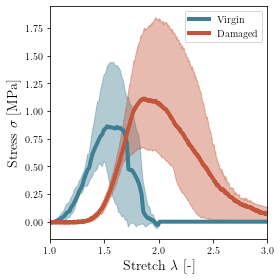

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_prop_cycle(cycler.cycler('color', cmap2(np.linspace(0,1,4)))) 
cm  = cmap2(np.linspace(0,1,4))
StressStretch = []
for i,specimen in enumerate(FractureData.loc[(FractureData['Location']=='Breast') & (FractureData['Test']=='F')& (FractureData['Pig']=='3')]['Name']):
    print(specimen)
    data = GetStressStretch(specimen)
    StressStretch.append(data)

StressStretch = np.asarray(StressStretch)
lam = lams = np.linspace(1,4,200)
avg = np.nanmean(StressStretch,axis=0)
min = np.nanmin(StressStretch,axis=0)
max = np.nanmax(StressStretch,axis=0)
std = np.nanstd(StressStretch,axis=0)
ax.plot(lam,avg,lw=4.0,label=r"Virgin",color=cm[0])
ax.set_xlim([1,3.0])
# ax.fill_between(lam,avg+std,avg-std,alpha=0.3)
ax.fill_between(lam,min,max,alpha=0.4,color=cm[0])
ax.set_ylabel(r'Stress $\sigma$ [MPa]',fontsize=14)
ax.set_xlabel(r'Stretch $\lambda$ [-]',fontsize=14)
# ax.set_title(f'Breast',fontsize=16)

# plt.savefig('Breast_Fracture',dpi=300)

Breast_stress_stretch_data = np.loadtxt('Breast_stress_stretch_data.csv',delimiter=',')
Belly_stress_stretch_data = np.loadtxt('Belly_stress_stretch_data.csv',delimiter=',')

avg = np.nanmean(Breast_stress_stretch_data[1:,:],axis=0)
min = np.nanmin(Breast_stress_stretch_data[1:,:],axis=0)
max = np.nanmax(Breast_stress_stretch_data[1:,:],axis=0)

lam = Breast_stress_stretch_data[0,:]
ax.plot(lam,avg,lw=4.0,label=r"Damaged",color=cm[-1])
ax.fill_between(lam,min,max,alpha=0.4,color=cm[-1])
ax.legend()

plt.tight_layout()
plt.savefig('Breast_Full',dpi=300)


In [6]:
Breast_stress_stretch_data = np.loadtxt('Breast_stress_stretch_data.csv',delimiter=',')
Belly_stress_stretch_data = np.loadtxt('Belly_stress_stretch_data.csv',delimiter=',')

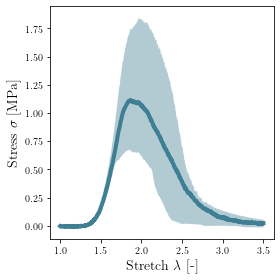

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_prop_cycle(cycler.cycler('color', cmap2(np.linspace(0,1,4)))) 
avg = np.nanmean(Breast_stress_stretch_data[1:,:],axis=0)
min = np.nanmin(Breast_stress_stretch_data[1:,:],axis=0)
max = np.nanmax(Breast_stress_stretch_data[1:,:],axis=0)

lam = Breast_stress_stretch_data[0,:]
ax.plot(lam,avg,lw=4.0)
ax.fill_between(lam,min,max,alpha=0.4)
ax.set_ylabel(r'Stress $\sigma$ [MPa]',fontsize=14)
ax.set_xlabel(r'Stretch $\lambda$ [-]',fontsize=14)
# ax.set_title(f'Breast',fontsize=16)
plt.tight_layout()
plt.savefig('Breast_Failure',dpi=300)

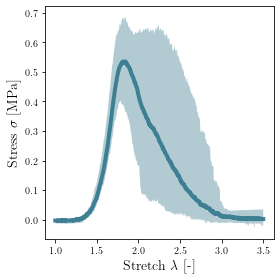

In [8]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_prop_cycle(cycler.cycler('color', cmap2(np.linspace(0,1,4)))) 
avg = np.nanmean(Belly_stress_stretch_data[1:,:],axis=0)
min = np.nanmin(Belly_stress_stretch_data[1:,:],axis=0)
max = np.nanmax(Belly_stress_stretch_data[1:,:],axis=0)

lam = Belly_stress_stretch_data[0,:]
ax.plot(lam,avg,lw=4.0)
ax.fill_between(lam,min,max,alpha=0.4)
ax.set_ylabel(r'Stress $\sigma$ [MPa]',fontsize=14)
ax.set_xlabel(r'Stretch $\lambda$ [-]',fontsize=14)
# ax.set_title(f'Belly',fontsize=16)
plt.tight_layout()
plt.savefig('Belly_Failure',dpi=300)

In [9]:
FractureData

,Name,Pig,Location,Direction,Test,Width,Thickness
0,PA_Belly_SubQ1_frac,A,Belly,Parallel,DF,31.416,1.910
1,PA_Belly_SubQ2_frac,A,Belly,Parallel,F,28.122,1.856
2,PA_Belly_SubQ4_frac,A,Belly,Perpendicular,DF,33.514,1.528
3,PA_Belly_SubQ5_frac,A,Belly,Perpendicular,DF,29.352,2.192
4,PA_Belly_SubQ6_frac,A,Belly,Parallel,DF,29.514,1.744
5,PA_Belly_SubQ8_frac,A,Belly,Perpendicular,DF,28.452,1.240
6,PA_Breast_SubQ1_frac,A,Breast,Parallel,DF,33.316,1.262
7,PA_Breast_SubQ2_frac,A,Breast,Parallel,F,19.460,1.806
8,PA_Breast_SubQ3_frac,A,Breast,Perpendicular,DF,31.198,1.286
9,PA_Breast_SubQ5_frac,A,Breast,Parallel,DF,25.272,1.172
